## A view into the energy consumption of Slovenia by type of energy source and usage yearly
Data mining, project, `12.4.2022`  
**`Marta Rašeta`, `Tilen Berlak`, `Aladin Ćemalović`**

In [1]:
#Preparing the data


#Replace the unknown/null values with -1 to be able to put them into a numpy matrix
with open("usage_data.csv") as f_input:
    text = [l.replace("-", "-1") for l in f_input]
import numpy as np
usage_data= np.loadtxt(text, delimiter=",", dtype="float")


column_names = []
row_names = []
#Get the column and row names 
f = open("usage_headers.csv", "r")
column_names=f.readline().strip().split(",")
print(column_names)

for x in f:
    row_names.append(x.strip())
row_names=np.array(row_names)    



['"2000 Energy source - TOTAL"', '"2000 Extra light fuel oil"', '"2000 Natural gas"', '"2000 Wood fuels"', '"2000 Liquefied petroleum gas"', '"2000 Electricity"', '"2000 Coal"', '"2000 District heat"', '"2000 Solar energy"', '"2000 Ambient heat"', '"2001 Energy source - TOTAL"', '"2001 Extra light fuel oil"', '"2001 Natural gas"', '"2001 Wood fuels"', '"2001 Liquefied petroleum gas"', '"2001 Electricity"', '"2001 Coal"', '"2001 District heat"', '"2001 Solar energy"', '"2001 Ambient heat"', '"2002 Energy source - TOTAL"', '"2002 Extra light fuel oil"', '"2002 Natural gas"', '"2002 Wood fuels"', '"2002 Liquefied petroleum gas"', '"2002 Electricity"', '"2002 Coal"', '"2002 District heat"', '"2002 Solar energy"', '"2002 Ambient heat"', '"2003 Energy source - TOTAL"', '"2003 Extra light fuel oil"', '"2003 Natural gas"', '"2003 Wood fuels"', '"2003 Liquefied petroleum gas"', '"2003 Electricity"', '"2003 Coal"', '"2003 District heat"', '"2003 Solar energy"', '"2003 Ambient heat"', '"2004 Ener

In [2]:
import matplotlib.pyplot as plt

w=int(len(column_names)/10)
h=len(row_names)-1

matrix = [[0 for x in range(h)] for y in range(w)] 

for year in range(w):
    count=0
    for x in usage_data[1:,year*10]:

        matrix[year][count]=x
        count+=1
  
npmat =np.array(matrix)

#Delete unnecessary metrics
names=np.delete(row_names,[0,5],0)
npmat=np.delete(npmat,4,axis=1)
matrix[matrix==-1]=np.nan

#### What is the average consumption of all energy consumers?
For this question we will calculate the average energy consumption for every usage and represent the data on a barplot. 

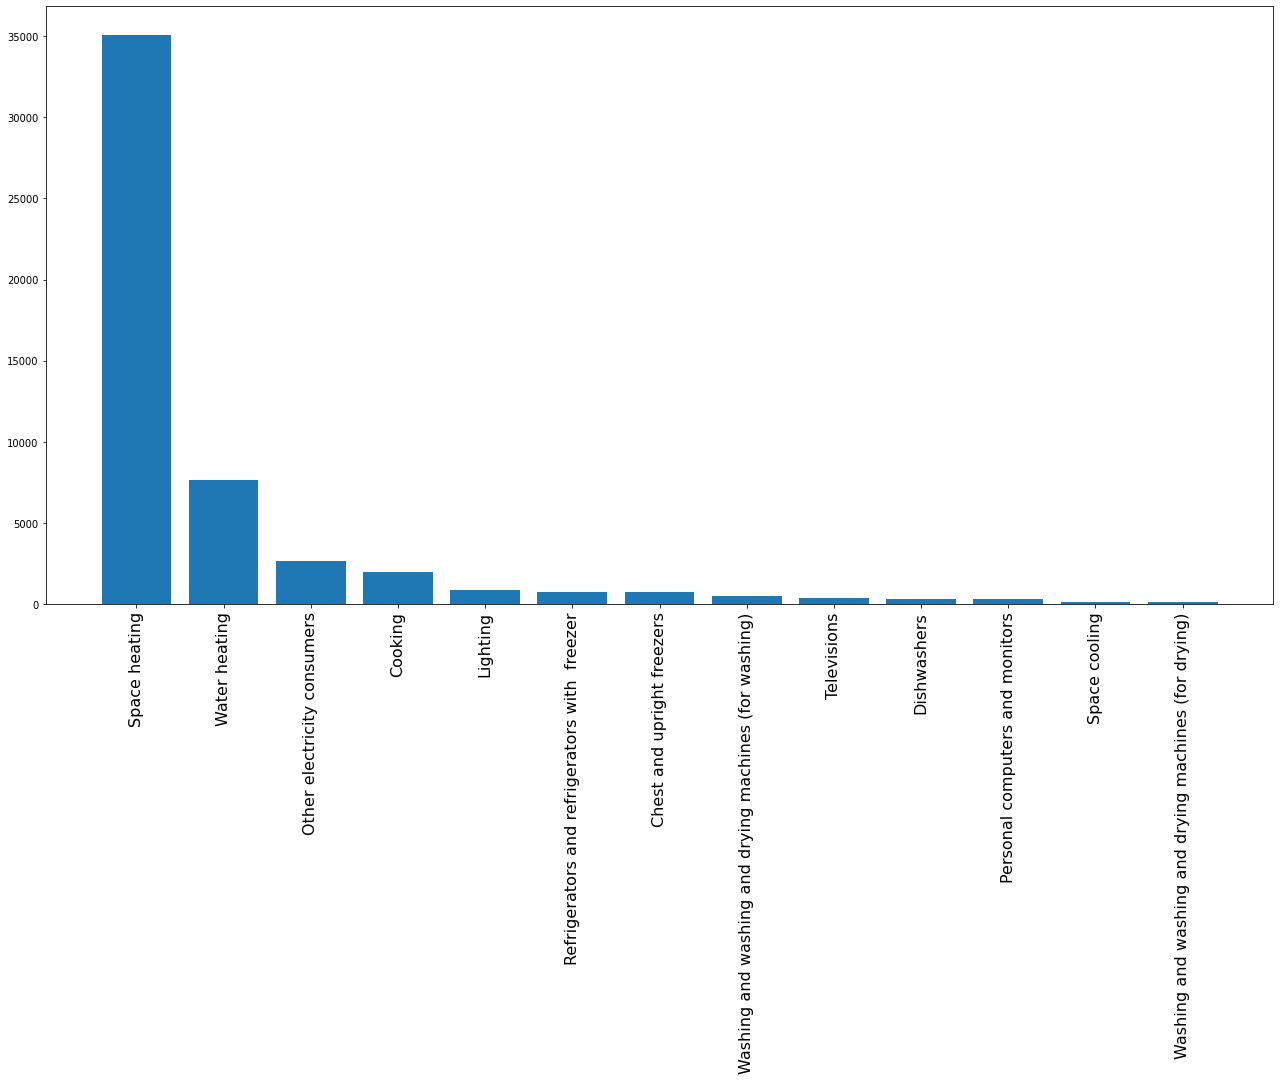

In [3]:
averages = []
transpose = npmat.transpose()
plt.figure(figsize=(22, 11))  
for x in transpose:
    averages.append(np.average(x))

np_names=np.array(names)
np_averages=np.array(averages)
indices = np.argsort(np_averages)[::-1]
plt.xticks(rotation='vertical',fontsize=16)
plt.bar(np_names[indices],np_averages[indices])  
plt.show()


#### Which are the 2 biggest consumers of all energy uses by year and how much do they consume?
For this question we will extract the top 2 energy consumers and represent their consumption over the years.
The unit used in the data is TJ (Terajoules).

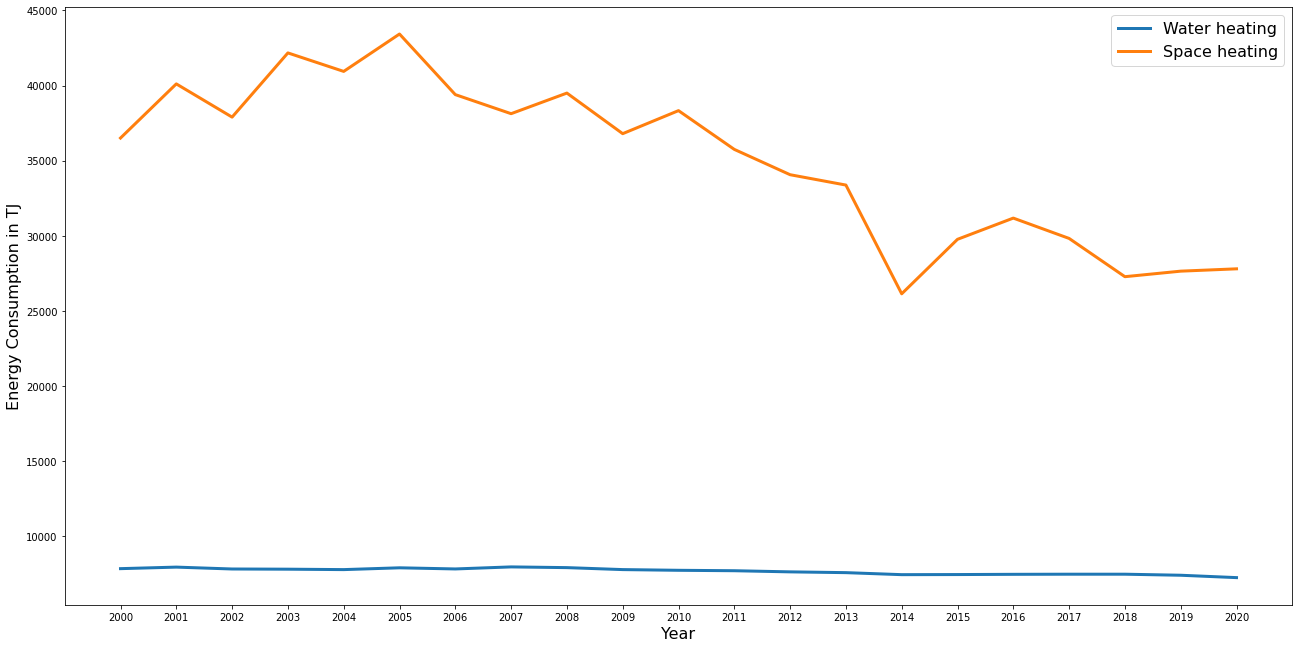

In [4]:

#Make dictionaries with top 2 consumption amounts by year
yearly_app = {}
yearly_cons={}
ct=0

for x in npmat:
    index_cons_max = np.argpartition(x, -2)[-2:]
    yearly_cons[str(2000+ct)]=x[index_cons_max]
    ct+=1


    
years=yearly_cons.keys()
n1=[]
n2=[]
for x in yearly_cons.values():
    n1.append(x[0])
    n2.append(x[1])



plt.figure(figsize=(22, 11))
plt.plot(years,n1,label=names[index_cons_max[0]], linewidth=3.0)
plt.plot(years,n2,label=names[index_cons_max[1]], linewidth=3.0)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Energy Consumption in TJ",fontsize=16)

plt.legend(fontsize=16)
plt.show()